In [137]:
%pylab inline
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
from itertools import compress  # seeing which drifters leave the domain
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import tracpy.op as op
from matplotlib import colors
#import os
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [174]:
lonps = {}   # lonp and latp for every day in every year
latps = {}
for year in range(1994,2011):
    lon = []
    lat = []
    for day in range(1,32):
        fname = "tracks/%dJuly%d.nc" %(day,year)
        d=netCDF.Dataset(fname)
        lonp = d["lonp"][:]   # lonp[drifter][hour]
        latp = d["latp"][:]
        lon.append(lonp)
        lat.append(latp)
    lonps[year] = lon
    latps[year] = lat    

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


In [164]:
proj = tracpy.tools.make_proj('nwgom-pyproj')

## 2d tracks

In [168]:
def tracks(lonp,latp,fig,ax,save=False):
    '''plot surface tracks of drifters in every month
    Args:
        lonp: [drifter,time] Drifter longitudes for all times
        latp: [drifter,time] Drifter latitudes for all times
    '''

    # Starting marker
    ax.plot(lonp[:, 0], latp[:, 0], 'o', color='g', markersize=3,
            label='_nolegend_', alpha=0.4, transform=pc)

    # Plot tracks
    ax.plot(lonp.T, latp.T, '-', color='grey', linewidth=.2, transform=pc)

    # Find final positions of drifters
    lonpc, latpc = tools.find_final(lonp, latp)
    ax.plot(lonpc, latpc, 'o', color='r', label='_nolegend_', transform=pc)

    if Title is not None:
        ax.set_title(Title)

    # Legend, of sorts
    # ax = gca()
    xtext = 0.45
    ytext = 0.18
    ax.text(xtext, ytext, 'starting location', fontsize=16, color='green',
         alpha=.8, transform=ax.transAxes)
    ax.text(xtext, ytext-.03, 'track', fontsize=16, color='grey',
         transform=ax.transAxes)
    ax.text(xtext, ytext-.03*2, 'ending location', fontsize=16, color='red',
         transform=ax.transAxes)

    if save:
        # Save figure into a local directory called figures. Make directory if it
        # doesn't exist.
        if not os.path.exists('figures'):
            os.makedirs('figures')

        fig.savefig('figures/' + fname + 'tracks.png', bbox_inches='tight')
    
    return fig, ax


TypeError: list indices must be integers or slices, not tuple

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


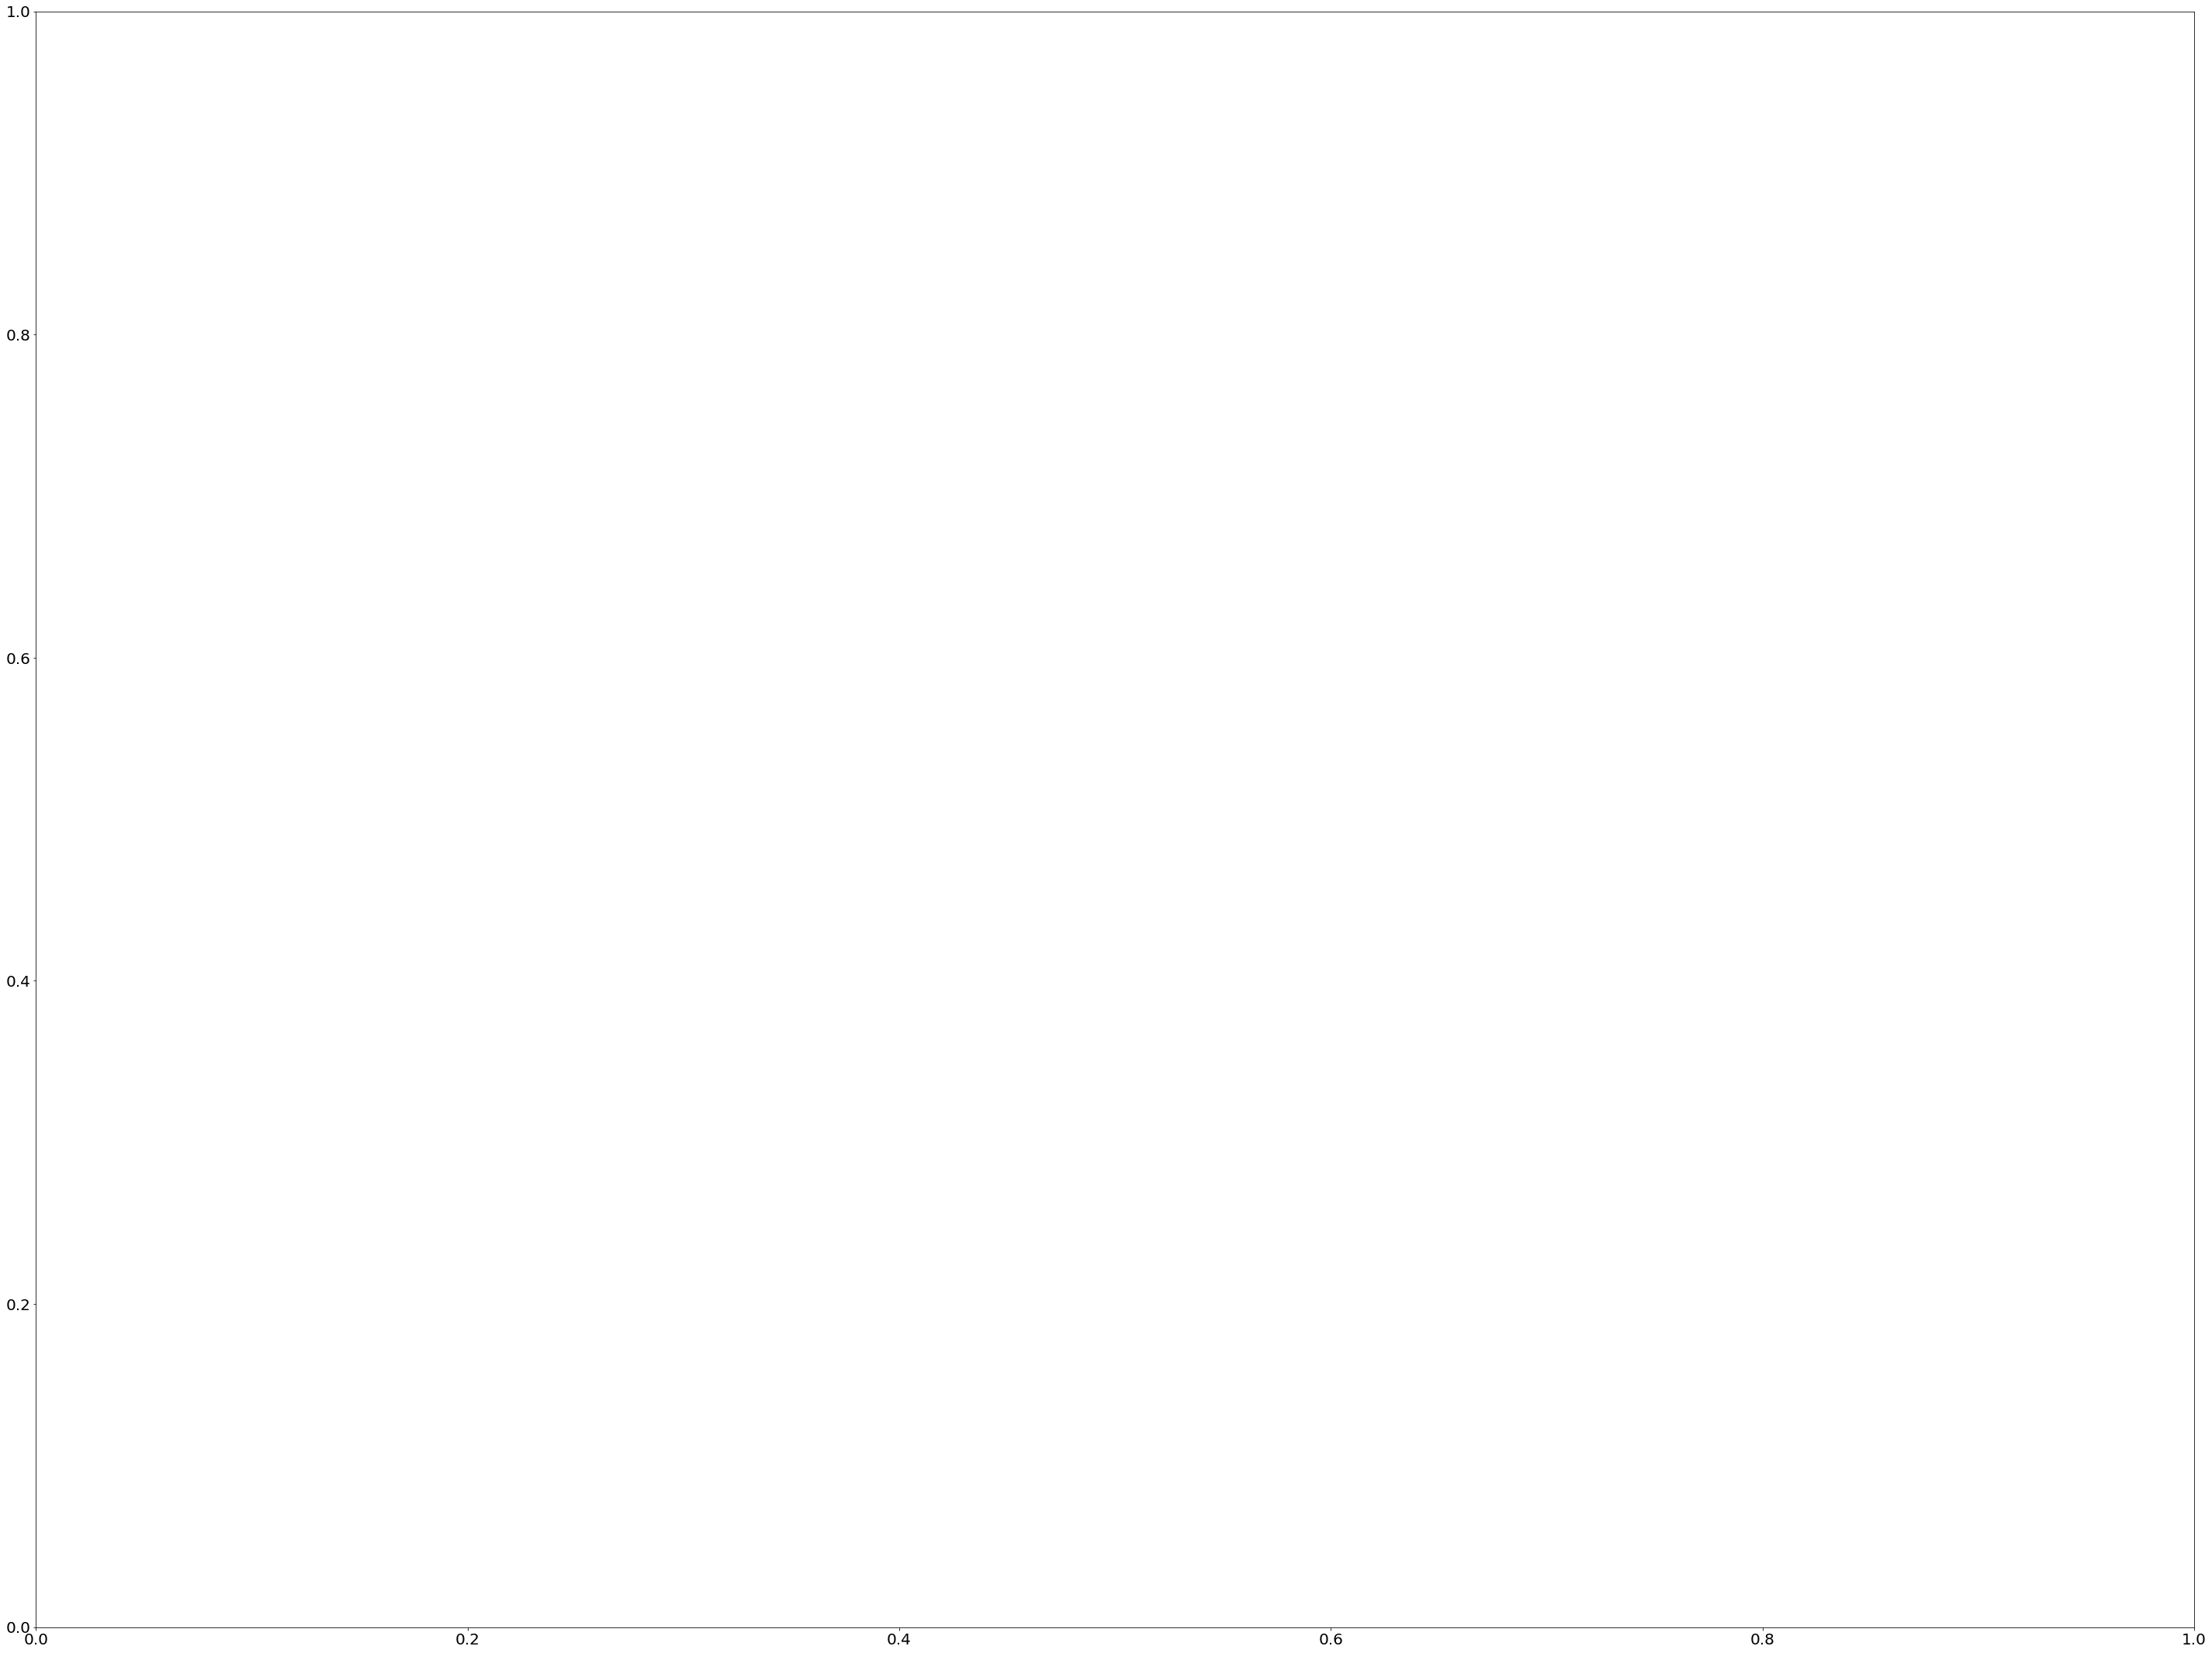

In [180]:
fig, axes = plt.subplots(1, 1, figsize=(40, 30), tight_layout=True)
fig, axes = tracks(lonp[2005],latp[2005],fig,axes)

## Starting location 2d histogram
- Need to fix axes
- add background map
- check if lognorm is appropriate

In [186]:
def monthhist(lonp,latp,yr,proj,fig=None,axes=None,bins=40,cmap="BuPu",save=False):
    '''plot drifter starting location concentrations for every day in the month
    Args:
        lonp[year]: [ [drifter,time], [drifter,time], ... , [drifter,time] ]
        latp[year]: [ [drifter,time], [drifter,time], ... , [drifter,time] ]
    '''
    lonf, latf = {},{}
    
    for year in lonp.keys():
        lon = []
        lat = []
        for i in range(len(lonp[year])):
            lonfin, latfin = tracpy.tools.find_final(lonp[year][i],latp[year][i])
            lon.append(lonfin)
            lat.append(latfin)
        lonf[year] = lon
        latf[year] = lat
        print(len(lon))
    
    if fig==None and axes==None:
        fig, axes = plt.subplots(len(lonp.keys()), 1, tight_layout=True)
    
    for i, ax in enumerate(axes.flat):
        year = 1994 + i
        if year > yr: break
        lon,lat = lonf[year],latf[year]
        x,y = proj(lon,lat)
        ax.hist2d(x, y, bins=bins, norm=colors.LogNorm(),cmap=cmap,range=[[-422893.1840546361, 607114.2511548102],
                                              [-773600.0225372436, 105158.33625709431]])
        ax.set_title("July %d" %(year),size=24)
    
    return fig, axes


/opt/tracpy/tracpy/tools.py:214: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:215: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:210: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  xpc.append(xp[idrift, find(ind3)[ind]])
/opt/tracpy/tracpy/tools.py:211: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  ypc.append(yp[idrift, find(ind3)[ind]])


31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31


TypeError: must be real number, not list

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


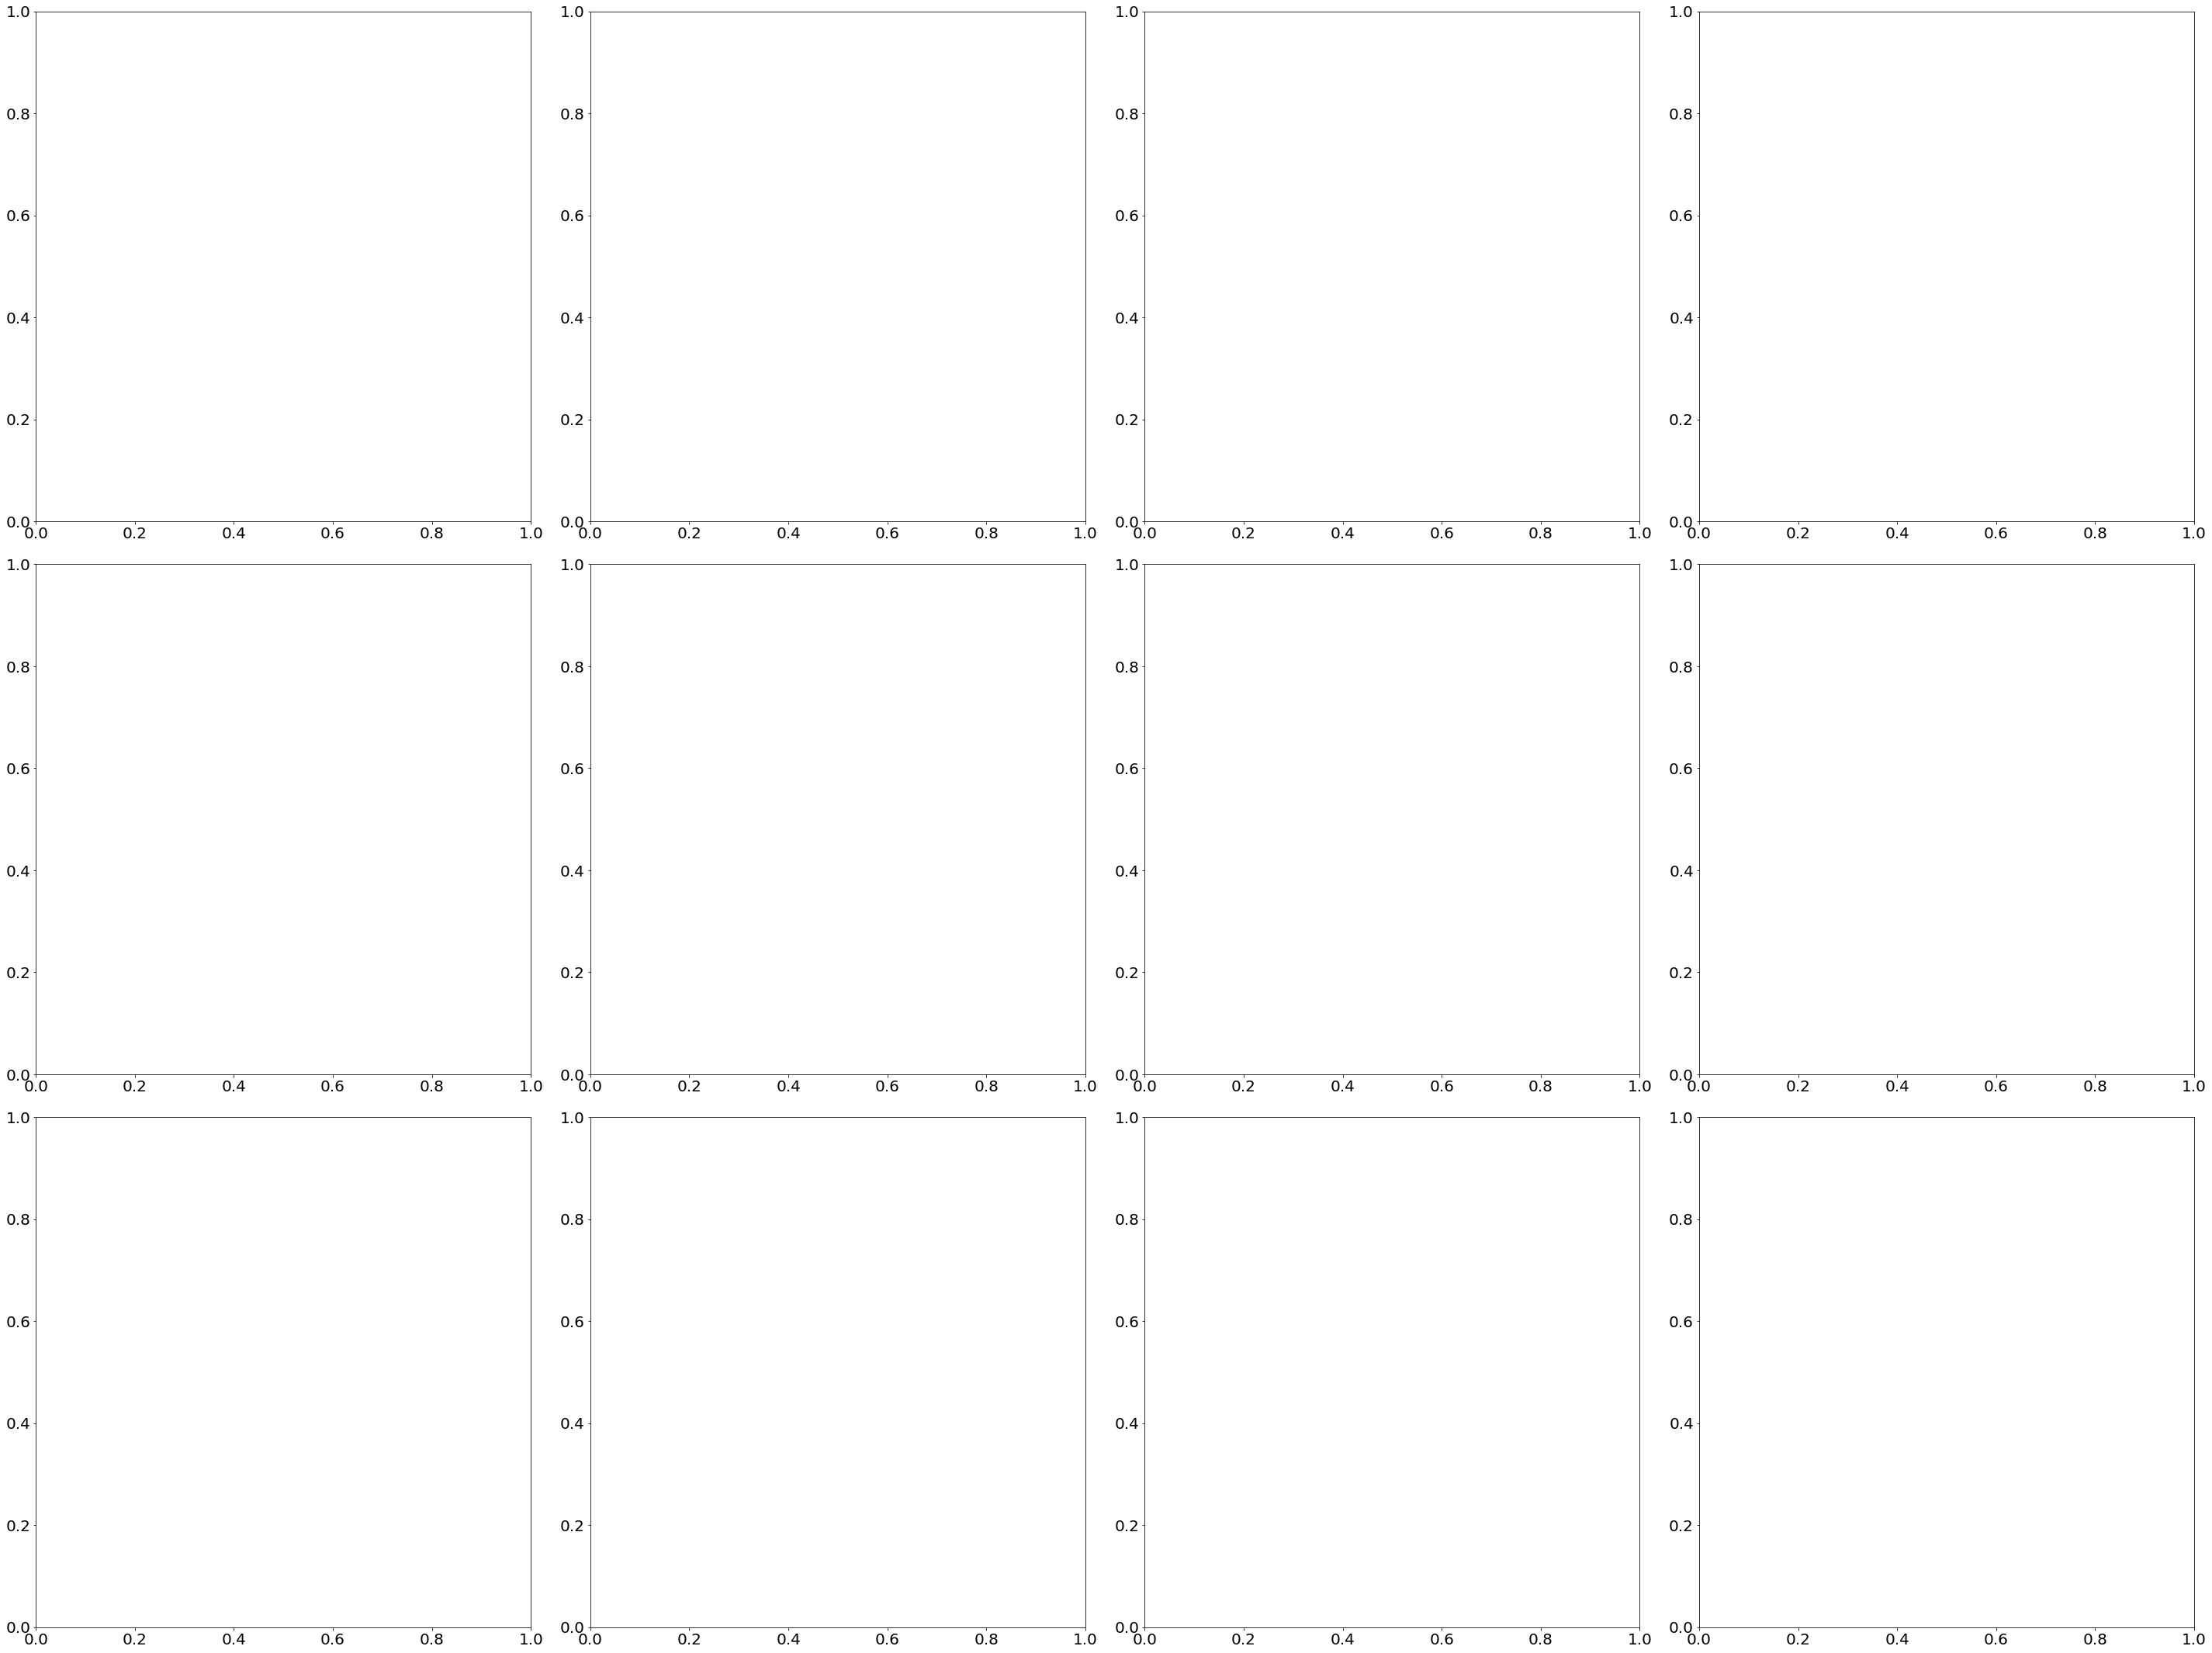

In [187]:
fig, axes = plt.subplots(3, 4, figsize=(40, 30), tight_layout=True)
fig, axes = monthhist(lonps,latps,2010,proj,fig=fig,axes=axes,bins=(90,80))

In [4]:
def temp(lonp,latp):
    '''return surface temperature from ROMS
    ***temperature from water column***
    
    Args:
        lonp: [drifter,time] Ending drifter longitudes
        latp: [drifter] Ending drifter latitudes
    '''
    
    return fig, ax



In [ ]:
def salinity(lonp,latp):
    '''return surface salinity from ROMS
    ***salinity from water column***'''
    
    return fig, ax
